<a href="https://colab.research.google.com/github/huaijiangzhu/SummerML/blob/master/day4/demo_fit_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fit a Polynomial

- You are given the data set below with x and y values.

- Try to fit the data using a polynomial with a certain degree.

- Calculate mean square error between the sample y and your predicted y.

- Try different polynomial degree and see if you can improve the mse.

- Plot your polynomial over the data points

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

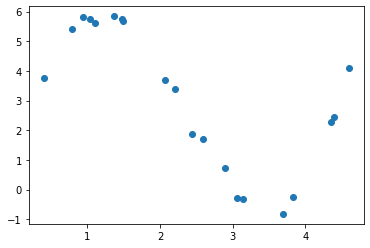

In [2]:
url = 'https://raw.githubusercontent.com/huaijiangzhu/SummerML/master/day4/polyfit_data.csv'
df = pd.read_csv(url)
x = df['x'].values
y = df['y'].values
plt.plot(x,y,'o')

## Solution (NumPy)

Polynomial degree = 4     mse = 0.03167588766531584


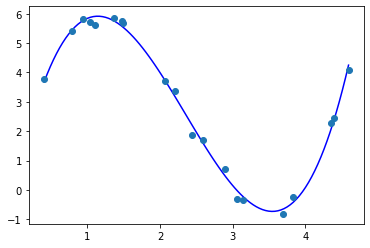

In [3]:
import numpy as np

degree = 4
weights = np.polyfit(x.reshape(-1,), y.reshape(-1,), degree)

model = np.poly1d(weights)

yhat = model(x)

mse = np.mean((y-yhat)**2)
print('Polynomial degree = {}    '.format(degree), 'mse = {}'.format(mse))

xline = np.linspace(np.min(x), np.max(x), 100)
yline = model(xline)
plt.plot(xline,yline,'b');
plt.plot(x,y,'o');

## Solution (scikit-learn)

Polynomial degree = 4     mse = 0.03167588766531582


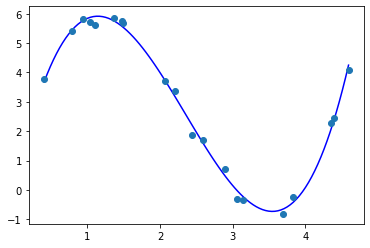

In [4]:
from sklearn import linear_model

def design_matrix(x, M):
    x = x.reshape(-1,1)
    bias_col = np.ones((x.shape[0], 1))
    PhiX = bias_col
    for i in np.arange(1, M+1):
        PhiX = np.hstack([PhiX, x**i])
    return PhiX

X = design_matrix(x, degree)
# fitting the model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, y)
w = reg.coef_

# training error
yhat = reg.predict(X)
mse = np.mean((y-yhat)**2)
print('Polynomial degree = {}    '.format(degree), 'mse = {}'.format(mse))
plt.plot(xline,reg.predict(design_matrix(xline, degree)),'b');
plt.plot(x,y,'o');